In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import warnings

## Part 1. K-means Clustering Analysis

### <span style="color:red">=========== Assignment 1 ===========</span>

In [2]:
# a) Complete an implementation of the partition function.

def partition(X, mu):
    """
    The function that produces a partition given the mean points use Euclidean distance
    Each input is numpy array:
        - X: (N, d), tha data
        - mu: (C, d), the mean points
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    # Get the number of points
    pt_num = X.shape[0]
    # Get the number of center points
    center_pt_num = mu.shape[0]

    # For loop to obtain the partition
    partition = []
    for i in range(pt_num):
        label = 0
        min_dist = 0
        # Compute a point to each center point, record the label of the point as the label of the center point with the minimum distance.
        for j in range(center_pt_num):
            dist = np.sqrt( np.sum( ((X[i] - mu[j])**2) ) )
            if j == 0:
                min_dist = dist
                label = j
                continue
            if min_dist > dist:
                min_dist = dist
                label = j
        partition.append(label)

    return partition

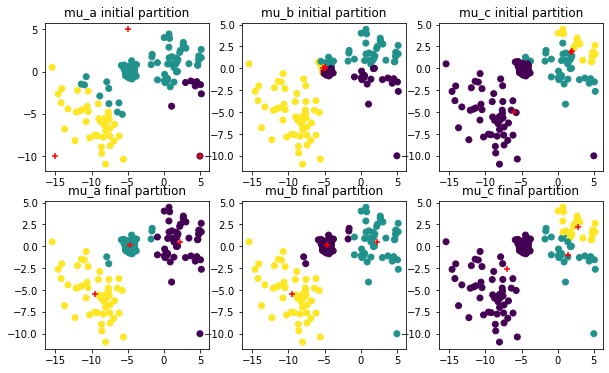

In [3]:
# Load data
X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) 

#############################
# b) Display the final and initial partitions in 2 rows and 3 columns

plt.figure(figsize=(10,6)) # do not change, this makes the figure size readable

# A function uses KMeans algorithm to calculate the center points
def kmeans_util(x, n_clusters, init_points):
    """
    Input: 
        -x: data to be clustered
        -n_clusters: number of clusters
        -init_points: cluster center initial point
    
    Return: KMeans algorithm clustering final center point
    """
    model = KMeans(n_clusters=n_clusters, init=init_points, n_init=1)
    model.fit(X=x)
    return model.cluster_centers_

# A function for plotting cluster result
def scatter_util(subplot_num, x, y, points_label, center_X, center_y, fig_title):
    """
    Input:
        -subplot_num: current subplot number
        -x: x axis of clustered data
        -y: y axis of clustered data
        -points_label: labels for each points
        -center_x: x axis of central data
        -center_y: y axis of central data
        -fig_title: title of scatter plot
    """
    plt.subplot(subplot_num)
    plt.scatter(x, y, c=points_label)
    plt.scatter(center_X, center_y, marker='+', color='red')
    plt.title(fig_title)

# for loop to show the initial and final partition of mu_a, mu_b, mu_c
plot_title = ["mu_a initial partition", "mu_b initial partition", "mu_c initial partition", "mu_a final partition", "mu_b final partition", "mu_c final partition"]
plot_counter = 231
for i in [mu_a, mu_b, mu_c]:
    scatter_util(plot_counter, X[:,0], X[:,1], partition(X, i), i[:,0], i[:,1], plot_title[(plot_counter-1)%230])

    kmeans_centers = kmeans_util(X, n_clusters=3, init_points=i)
    scatter_util(plot_counter+3, X[:,0], X[:,1], partition(X, kmeans_centers), kmeans_centers[:,0], kmeans_centers[:,1], plot_title[(plot_counter-1)%230+3])

    plot_counter += 1

plt.show()

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>


In [4]:
# (a) Implement the scatter-based F-ratio index in Python where Euclidean distance is used

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 
    k = len(np.unique(lb))
    _,d = np.shape(X)
    n = np.zeros(k)
    c = np.zeros([k,d])
    
    # Group the input data by label
    clusters = []
    for i in range(k):
        curr_label = np.unique(lb)[i]
        curr_cluster = []
        for j in range(X.shape[0]):
            if lb[j] == curr_label:
                curr_cluster.append(X[j])

        n[i] = len(curr_cluster)
        c[i] = np.mean(curr_cluster, axis=0)

        clusters.append(curr_cluster)

    # Compute the SSW
    ssw = 0
    for i in np.unique(lb):
        dist_sqr = np.sum( (clusters[i] - c[i])**2 )
        ssw += dist_sqr
        
    # Compute the SSB
    ssb = 0
    for i in np.unique(lb):
        global_mean = np.mean(X, axis=0)
        ssb += n[i] * np.sum((global_mean-c[i])**2)

    # Compute the f ratio
    f_ratio = (k * ssw) / ssb

    return f_ratio

warnings.filterwarnings('ignore')

In [5]:
################
# (b) run the the K-means each with 3 different random initialisations for different K

X = np.load('./Data/kmeans_data_2.npy')

# These lists are used to store the best model and f_ratio value
models = []
f_ratio = []
# Run for different k
for i in range(2,11):
    seed_counter = 20
    temp_models = []
    temp_f_ratio = []
    
    # Run KMeans with 3 different random initialisations
    for j in range(3):
        # Get center points of random initialisations
        np.random.seed(seed_counter)
        init_centers = np.array([np.random.logistic(size=2) for m in range(i) ])
        seed_counter += 1

        # Train the model
        model = KMeans(n_clusters=i, init=init_centers, n_init=1)
        model.fit(X)
        labels = model.labels_

        # Record the current model and f_ratio
        temp_models.append(model)
        temp_f_ratio.append(f_ratio_euclidean(X, labels))

    # Store the best model and f_ratio
    f_ratio.append(np.min(temp_f_ratio))
    models.append(temp_models[np.argmin(temp_f_ratio)])

The best K is: 5


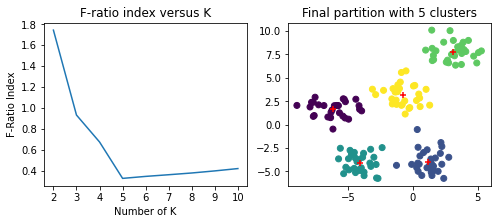

In [6]:
# Now, plot f_ratio with number of clusters, print the best k and create another plot for cluster visualization
# You can use the plt.subplot call to organize this and the following figure from (c) in one row.
plt.figure(figsize=(8,3)) # Do not change.

plt.subplot(121)
# Get the best k with lowest f_ratio index value
best_k_index = np.argmin(f_ratio)
print("The best K is: %d" %(best_k_index+2) )
plt.plot([i for i in range(2,11)], f_ratio)
plt.xlabel("Number of K")
plt.ylabel("F-Ratio Index")
plt.xticks([i for i in range(2,11)])
plt.title("F-ratio index versus K")

# (c) Display the final partition with optimal number of clusters
plt.subplot(122)
# Get the best model
best_model = models[best_k_index]
plt.scatter(X[:,0], X[:,1], c=best_model.labels_)
plt.scatter(best_model.cluster_centers_[:,0], best_model.cluster_centers_[:,1], marker='+', color='red')
plt.title("Final partition with 5 clusters")
plt.show()

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Spectral Clustering Analysis

### <span style="color:red">=========== Assignment 3 ===========</span>

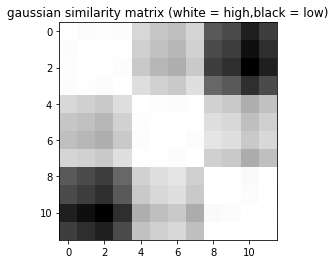

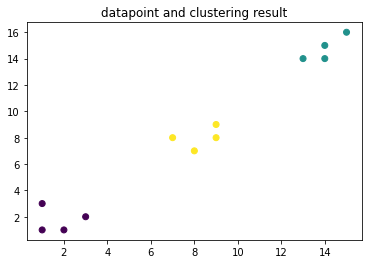

In [7]:
# Here you are to implement the asymmetric normalised spectral clustering algorithm.

from sklearn.metrics import pairwise_distances
def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using an RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    # Compute the distance matrix
    dist_matrix = pairwise_distances(X)
    # Compute sililarity matrix
    W = np.exp(- ((dist_matrix**2) / (2*(delta**2)) ))
    return W


def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagonal matrix, which is simple to compute.
    #
    # Hint: There is no unreal eigen value here, but sometimes numerical precision problems happen.
    #       Use np.real when necessary.
    #
    # First do eigen analysis. 

    # Comptue D
    D = np.diagflat(W.sum(axis=1))
    # Compute L
    L = D - W
    # Compute Asymmetric Normalised Laplacian
    asym = np.dot(np.linalg.inv(D), L)

    # Eigen decomposition and apply ascending sort
    e, v = np.linalg.eig(asym)
    sort_index = np.argsort(e)
    e = e[sort_index][:k]
    v = v[:, sort_index][:,0:k]
    v = np.real(v)

    # Using first k eigenvectors to fit KMeans algorithm
    model = KMeans(n_clusters=k, random_state=20)
    model.fit(v)

    lb = model.labels_

    return lb,e,v

# The following code to be used for testing student's implementation during marking. Don't change!

X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])

W = gaussian_similarity(X,delta = 38)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

lb,_,_ = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

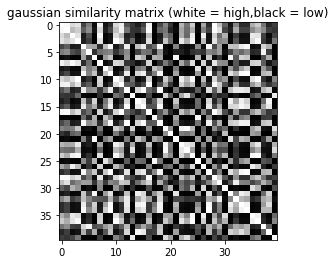

a) One hyperparameter value for Gaussian kernel: 3.0
b) First non-zero eigen vector (rounded): 
 [[-0.08618754 -0.05962003 -0.13412634 -0.13060652  0.13374037  0.05978801
   0.20404989 -0.11118578  0.19391663  0.1498295 ]
 [-0.1384257  -0.08672279  0.1150906  -0.23477295  0.16453209  0.13164761
  -0.07751742  0.26189505  0.12710981 -0.17311114]
 [-0.25107169  0.22157288 -0.14822107 -0.17572305 -0.14797434  0.23506163
  -0.161645    0.15413301 -0.08211894  0.01079535]
 [-0.20659964  0.18165254  0.06270527  0.15406599  0.15447118 -0.16322424
  -0.14906091  0.08440525  0.14952268 -0.23207026]]


In [8]:
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# Load data.
X = np.load('./Data/SC_data_1.npy')

# a)
# Compute a suitable delta value
# This delta value is used to scale the data, so it can be described by the difference of the distribution of the data
delta = np.sqrt( np.sum((X.max(axis=0) - np.abs(X.min(axis=0)))) )
delta = round(delta, 1)

# b)
# Get similarity matrix, D and L
W = gaussian_similarity(X, delta)
D = np.diagflat(W.sum(axis=1))
L = D-W

# Eigen decomposition and apply ascending sort
e, v = np.linalg.eig(L)
sort_index = np.argsort(e)
e = e[sort_index]
v = v[:,sort_index]

# Get the first non-zero eigen vector
non_zero_index = 0
for i in range(len(e)):
    if round(e[i], 10) != 0:
        non_zero_index = i
        break

plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

print('a) One hyperparameter value for Gaussian kernel:', delta)
print('b) First non-zero eigen vector (rounded): \n', v[:, non_zero_index].reshape(4,10))

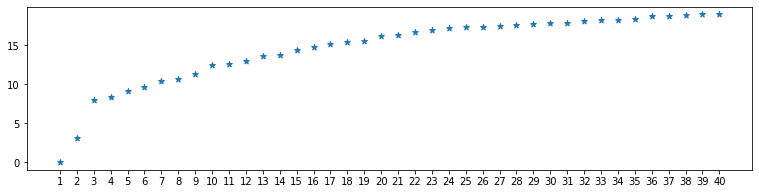

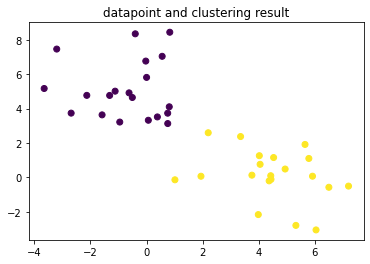

c)  2  clusters, because the biggest eigengap appears in  2 and  3


In [10]:
# c) 
# Most stable clustering is usually decided by a K that maximizes the
# eigengap (see the lecture slide)

# Compute all eigen gaps
eigen_gaps_list = []
for i in range(len(e)-1):
    eigen_gaps_list.append(e[i+1]-e[i])
# Get the biggest eigen gap
eigen_gap = np.argmax(eigen_gaps_list)+1

plt.figure(figsize=(13,3))
plt.scatter([i for i in range(1,41,1)], e, marker='*')
plt.xticks([i for i in range(1,41,1)])
plt.show()

lb,_,_ = asymmetric_SC(gaussian_similarity(X,delta),eigen_gap)

plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

print('c) ',  eigen_gap, ' clusters, because the biggest eigengap appears in ', eigen_gap, 'and ', eigen_gap+1 )

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

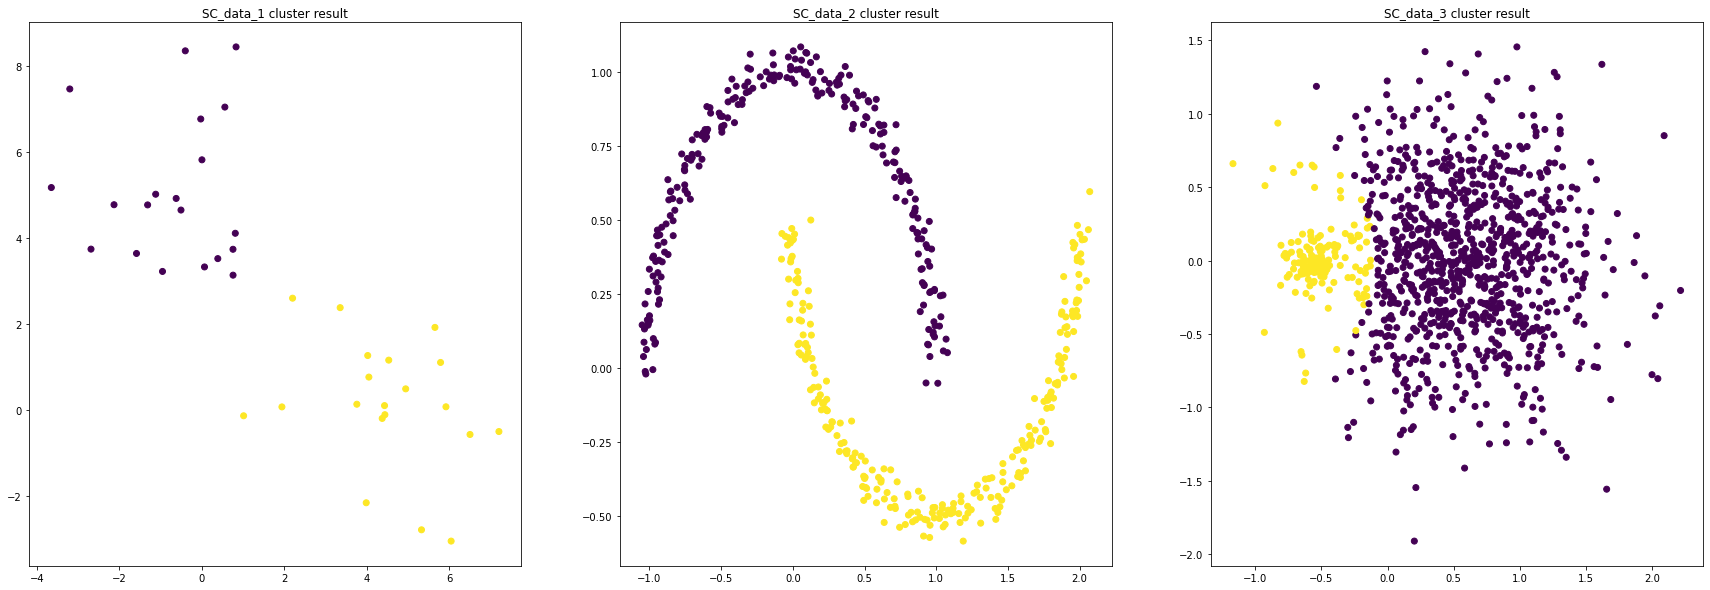

In [12]:
# Load data
X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')

plt.figure(figsize=(30, 10))

# Define a function for plotting, parameters similary with plot_util function above
def plot_util2(subplot_num, x, y, points_label, fig_title):
    plt.subplot(subplot_num)
    plt.scatter(x, y, c = points_label)
    plt.title(fig_title)

# for loop to plot
plot_num_counter = 131
for i in [ [X1, 3, "SC_data_1 cluster result"], [X2, 0.1, "SC_data_2 cluster result"], [X3, 0.25, "SC_data_3 cluster result"] ]:
    W = gaussian_similarity(i[0], i[1])
    lbs, _, _ = asymmetric_SC(W, k=2)
    plot_util2(plot_num_counter, i[0][:,0], i[0][:,1], lbs, i[2])
    plot_num_counter+=1

plt.show()

Question (b)

The algorithm is suitable for the first two datasets, but not for the third dataset. Because there is no clear boundary between the two clusters in the third dataset, it is difficult for the algorithm to judge the two clusters. Therefore, if delta changes, it may predict very different.(As shown below)

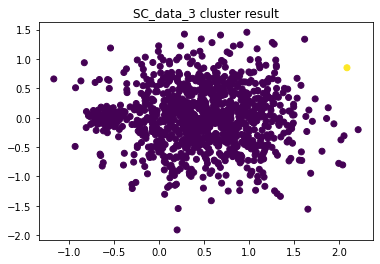

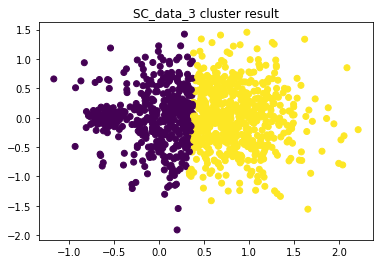

In [34]:
plot_num_counter = 131

for i in [0.2, 1]:
    W = gaussian_similarity(X3, i)
    lbs, _, _ = asymmetric_SC(W, k=2)
    plt.figure()
    plt.scatter(X3[:,0], X3[:,1], c = lbs)
    plt.title("SC_data_3 cluster result")
    plot_num_counter+=1

plt.show()

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 3. Hierarchical Clustering Analysis

### <span style="color:red">=========== Assignment 6 ===========</span>

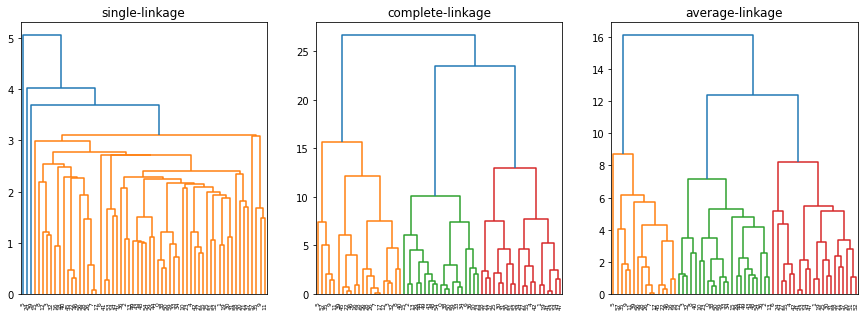

In [13]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
X = np.load('./Data/HC_data.npy')
# (a)
plt.figure(figsize=(15, 5))
link_types = ['single','complete','average']

subplot_counter = 131
linkage_matrix_list = []
for i in link_types:
    # Get linkage matrix for different method
    linkage_matrix = linkage(y=X, method=i, metric='euclidean')

    plt.subplot(subplot_counter)
    plt.title("%s-linkage" %i)
    # Plot
    dendrogram(linkage_matrix)
    subplot_counter += 1

    # Store the linkage matrix
    linkage_matrix_list.append(linkage_matrix)
    
plt.show()


In [14]:
# (b) Implement the following function to the longest K-cluster lifetime from a dedrogram 
def get_longest_lifetime(Z):
    """
    :param Z:   A (N,4) shape matrix. At the i-th iteration,
                clusters with indices Z[i, 0] and Z[i, 1] are combined
                to form cluster . A cluster with an index less than n
                corresponds to one of the n original observations.
                The distance between clusters Z[i, 0] and Z[i, 1] is
                given by Z[i, 2]. The fourth value Z[i, 3] represents
                the number of original observations in the newly formed cluster.
    :return:    (lifetime, k): [float,int];
                lifetime - the maximum lifetime detected.
                k - number of clusters for which the maximum lifetime was detected.
    """

    # Compute the lifetimes and get the longest
    lifetime_list = Z[1:,2] - Z[0:len(Z)-1, 2]
    lifetime = lifetime_list.max()

    # Get the best k corresponding to longest lifetime
    k = len(Z) - np.argmax(lifetime_list)

    return lifetime, k

# Do NOT delete line below
print(get_longest_lifetime(np.array([[0,3],[1,2],[2,3],[2,3]],dtype='float').T))

(1.0, 2)


The longest K-cluster lifetime for single-linkage is: 1.040582; And the number of clusters: 2
The longest K-cluster lifetime for complete-linkage is: 7.803205; And the number of clusters: 3
The longest K-cluster lifetime for average-linkage is: 3.744521; And the number of clusters: 2


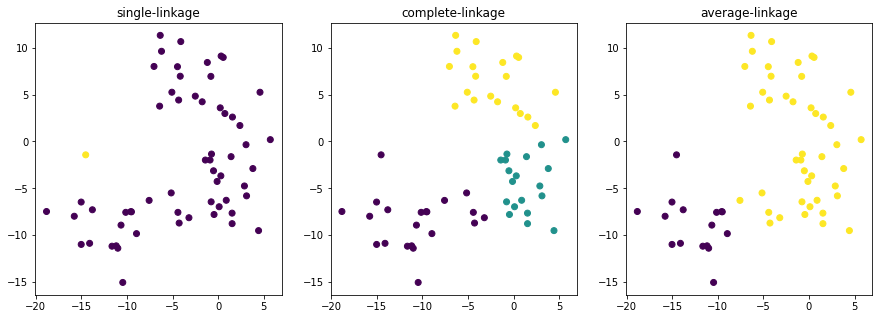

In [15]:
# (c) Clustering results
# Your code here:
plt.figure(figsize=(15, 5))

subplot_counter = 131
for i in range(len(linkage_matrix_list)):
    # Get linkage matrix obtained above
    Z = linkage_matrix_list[i]
    # Get longest lifetime and k
    lifetime, k = get_longest_lifetime(Z)
    print("The longest K-cluster lifetime for %s-linkage is: %f; And the number of clusters: %d" %(link_types[i], lifetime, k))

    # plot
    plt.subplot(subplot_counter)
    labels = fcluster(Z, k, criterion='maxclust')
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title("%s-linkage" %link_types[i])

    subplot_counter += 1


plt.show()

### <span style="color:red">=========== End of Assignment 6 ===========</span>

## Part 4. Ensemble Clustering Analysis

### <span style="color:red">=========== Assignment 7 ===========</span>

In [16]:
# Let's firstly compute the co-association matrix for single cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))

    # Compute the co-association matrix
    bool_to_int = lambda x: 1 if x else 0
    for i in range(len(co_matrix)):
        for j in range(len(co_matrix[i])):
            co_matrix[i][j] = bool_to_int(y[i]==y[j])
    return co_matrix


# The following code to be used for testing student's implementation during marking. Don't change!
y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp

array([[1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.]])

In [17]:
# Now compute the co-association matrix for multiple cluster result
# Hint: You can reuse the 'compute_co_matrix_for_single_cluster(y)' function.

def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    # Initialize and compute the co-association matrix
    co_matrix = np.zeros( (len(y_list[0]), len(y_list[0])) )
    for i in y_list:
        co_matrix += compute_co_matrix_for_single_cluster(i)

    co_matrix /= len(y_list)

    return co_matrix


# The following code to be used for testing student's implementation during marking. Don't change!
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
co_matrix_tmp = compute_co_matrix([y1,y2])
co_matrix_tmp

array([[1. , 0. , 0.5, 0. , 1. ],
       [0. , 1. , 0.5, 1. , 0. ],
       [0.5, 0.5, 1. , 0.5, 0.5],
       [0. , 1. , 0.5, 1. , 0. ],
       [1. , 0. , 0.5, 0. , 1. ]])

In [18]:
# Implement the ensemble clustering given a co_matrix
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensemble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    # Compute the distance matrix
    dist_matrix = 1 - co_matrix
    # Get the linkage matrix
    Y = squareform(dist_matrix)
    Z = linkage(Y, method=link_type)
    return Z

### <span style="color:red">=========== End of Assignment 7 ===========</span>

### <span style="color:red">=========== Assignment 8 ===========</span>

The best cluster number: 2; with the longest lifetime: 0.214286


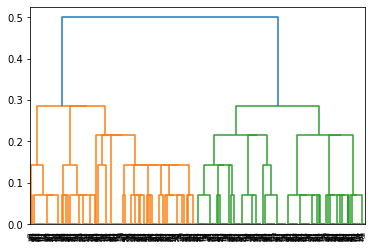

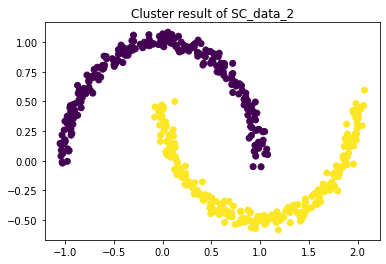

In [21]:
X = np.load('./Data/SC_data_2.npy')
y_list = []
np.random.seed(1) # Ensure the results are same on submission
# Now apply your ensemble clustering implementation with K-means

# for loop for different k
for i in range(2,16):
    # Get the random initialized center points
    init_x = np.random.uniform(X.min(axis=0)[0],X.max(axis=0)[0], size=(1,i))
    init_y = np.random.uniform(X.min(axis=0)[1],X.max(axis=0)[1], size=(1,i))
    init_centers = np.concatenate( (init_x.T, init_y.T), axis=1 )

    # Fit the model with center points obtained above
    model = KMeans(n_clusters=i, init=init_centers, n_init=1)
    model.fit(X)
    y_list.append(model.labels_)

# Get co-association matrix, longest lifetime and k
co_matrix = compute_co_matrix(y_list)
Z = ensemble_clustering(co_matrix)
R = dendrogram(Z)
lifetime, k = get_longest_lifetime(Z)
print("The best cluster number: %d; with the longest lifetime: %f" %(k, lifetime))

# Get clusters of each point by linkage matrix
clusters = fcluster(Z, k, criterion='maxclust') 
plt.figure()
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title("Cluster result of SC_data_2")
plt.show()

The best cluster number: 2; with the longest lifetime: 1.158086


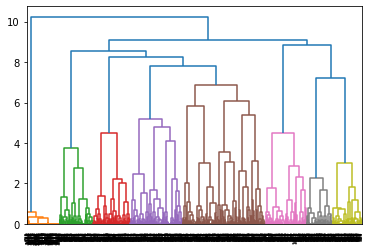

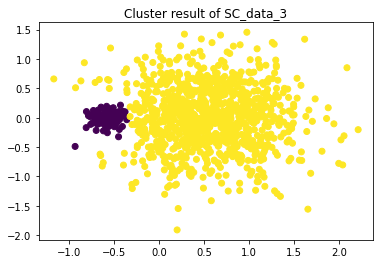

In [22]:
X = np.load('./Data/SC_data_3.npy')
y_list = []
np.random.seed(1)
# linkage: string, can be one of {'single','ward','average','complete'}

# for loop for different k
for i in range(10,30):
    # Get the random initialized center points
    init_x = np.random.uniform(X.min(axis=0)[0],X.max(axis=0)[0], size=(1,i))
    init_y = np.random.uniform(X.min(axis=0)[1],X.max(axis=0)[1], size=(1,i))
    init_centers = np.concatenate( (init_x.T, init_y.T), axis=1 )

    # Fit the model with center points obtained above
    model = KMeans(n_clusters=i, init=init_centers, n_init=1)
    model.fit(X)
    y_list.append(model.labels_)

# Get co-association matrix, longest lifetime and k
co_matrix = compute_co_matrix(y_list)
Z = ensemble_clustering(co_matrix, link_type='ward')
R = dendrogram(Z)
lifetime, k = get_longest_lifetime(Z)
print("The best cluster number: %d; with the longest lifetime: %f" %(k, lifetime))

# Get clusters of each point by linkage matrix
clusters = fcluster(Z, t=k,criterion='maxclust') 
plt.figure()
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title("Cluster result of SC_data_3")
plt.show()

### <span style="color:red">=========== End of Assignment 8 ===========</span>